In [38]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [39]:
df_num = pd.read_csv('data/train_cleaned_num.csv')

df_num

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,7,2003,2003,856,1710,2,0,548,208500
1,6,1976,1976,1262,1262,2,1,460,181500
2,7,2001,2002,920,1786,2,1,608,223500
3,7,1915,1970,756,1717,1,1,642,140000
4,8,2000,2000,1145,2198,2,1,836,250000
...,...,...,...,...,...,...,...,...,...
1454,6,1999,2000,953,1647,2,1,460,175000
1455,6,1978,1988,1542,2073,2,2,500,210000
1456,7,1941,2006,1152,2340,2,2,252,266500
1457,5,1950,1996,1078,1078,1,0,240,142125


In [40]:
df_whole_analysis = pd.read_csv('data/train_cleaned_analyse.csv')

df_whole_analysis

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice,HouseStyle_1.5Unf,...,Neighborhood_Veenker,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,856,1710,2,0,548,208500,False,...,False,False,False,True,False,False,False,False,True,False
1,6,1976,1976,1262,1262,2,1,460,181500,False,...,True,False,False,True,False,False,False,False,True,False
2,7,2001,2002,920,1786,2,1,608,223500,False,...,False,False,False,True,False,False,False,False,True,False
3,7,1915,1970,756,1717,1,1,642,140000,False,...,False,False,False,True,False,False,False,False,False,False
4,8,2000,2000,1145,2198,2,1,836,250000,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6,1999,2000,953,1647,2,1,460,175000,False,...,False,False,False,True,False,False,False,False,True,False
1455,6,1978,1988,1542,2073,2,2,500,210000,False,...,False,False,False,True,False,False,False,False,True,False
1456,7,1941,2006,1152,2340,2,2,252,266500,False,...,False,False,False,True,False,False,False,False,True,False
1457,5,1950,1996,1078,1078,1,0,240,142125,False,...,False,False,False,True,False,False,False,False,True,False


In [50]:
df_whole_fanova = pd.read_csv('data/train_cleaned_anova.csv')

df_whole_fanova

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice,HouseStyle_1.5Unf,...,Neighborhood_Veenker,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,856,1710,2,0,548,208500,False,...,False,False,False,True,False,False,False,False,True,False
1,6,1976,1976,1262,1262,2,1,460,181500,False,...,True,False,False,True,False,False,False,False,True,False
2,7,2001,2002,920,1786,2,1,608,223500,False,...,False,False,False,True,False,False,False,False,True,False
3,7,1915,1970,756,1717,1,1,642,140000,False,...,False,False,False,True,False,False,False,False,False,False
4,8,2000,2000,1145,2198,2,1,836,250000,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6,1999,2000,953,1647,2,1,460,175000,False,...,False,False,False,True,False,False,False,False,True,False
1455,6,1978,1988,1542,2073,2,2,500,210000,False,...,False,False,False,True,False,False,False,False,True,False
1456,7,1941,2006,1152,2340,2,2,252,266500,False,...,False,False,False,True,False,False,False,False,True,False
1457,5,1950,1996,1078,1078,1,0,240,142125,False,...,False,False,False,True,False,False,False,False,True,False


In [51]:
#1 Erstes Beispiel einer Lineare Regression mit Korrelationsmatrix Features Selection.

# Daten aufteilen

X = df_num.drop(['SalePrice'], axis=1)

y = df_num['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Merkmale skalieren (WICHTIG!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model_lr = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr.fit(X_train, y_train)

print("Lineare Regression trainiert.")
print(f"Achsenabschnitt (c): {model_lr.intercept_:.2f}")
print(f"Steigung (m): {model_lr.coef_[0]:.2f}")

Lineare Regression trainiert.
Achsenabschnitt (c): -1256918.86
Steigung (m): 20024.03


In [54]:
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nMean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")



Mean Squared Error (MSE): 1039977460.98
R-squared (R²): 0.84


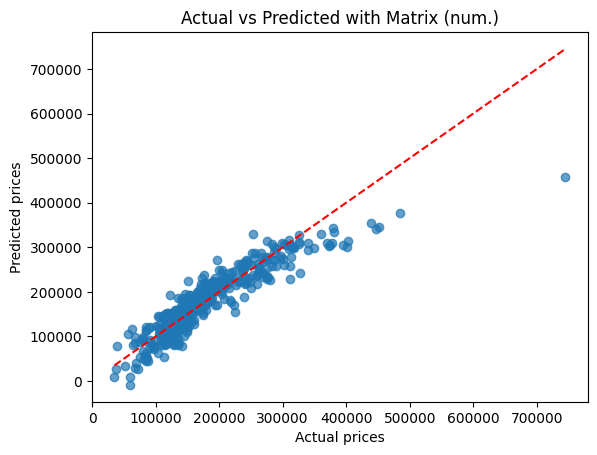

In [55]:
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [56]:
#2 Lineare Regression Model anpassen, numerisch mit Matrix und kategorische mit Hintergrundkenntnisse und Analyse).

X_c = df_whole_analysis.drop(['SalePrice'], axis=1)

y_c = df_whole_analysis['SalePrice']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

# Merkmale skalieren (WICHTIG!)
scaler = StandardScaler()
X_train_scaled_c = scaler.fit_transform(X_train_c)
X_test_scaled_c = scaler.transform(X_test_c)

model_lr_c = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr_c.fit(X_train_scaled_c, y_train_c)

print("Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.")
print(f"Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_c.intercept_:.2f}")
print(f"Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): {model_lr_c.coef_[0]:.2f}")

y_pred_lr_c = model_lr_c.predict(X_test_scaled_c)

mse_lr_c = mean_squared_error(y_test_c, y_pred_lr_c)
r2_lr_c = r2_score(y_test_c, y_pred_lr_c)

print(f"\nMean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): {mse_lr_c:.2f}")
print(f"R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): {r2_lr_c:.2f}")


Lineare Regression mit Matrix und Hintegrundkenntnisse (bei Kat.) trainiert.
Achsenabschnitt mit Matrix und Hintegrundkenntnisse (bei Kat.): 181126.18
Steigung mit Matrix und Hintegrundkenntnisse (bei Kat.): 20752.42

Mean Squared Error mit Matrix und Hintegrundkenntnisse (bei Kat.) (MSE): 952953511.19
R-squared mit Matrix und Hintegrundkenntnisse (bei Kat.) (R²): 0.85


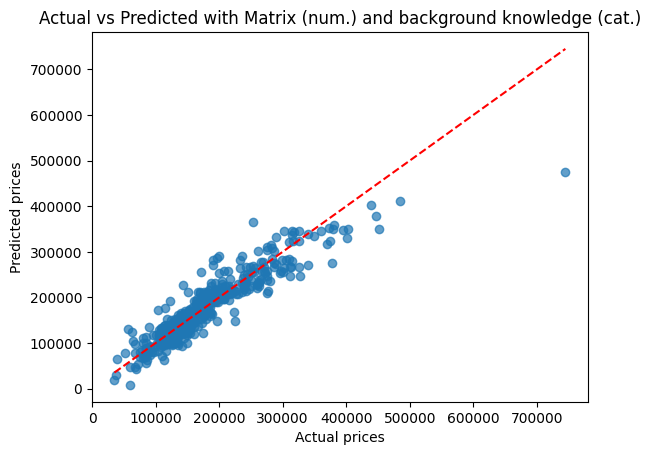

In [57]:
plt.scatter(y_test_c, y_pred_lr_c, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.) and background knowledge (cat.)")
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], 'r--') 
plt.show()

In [59]:
#2 Lineare Regression Model anpassen, numerisch mit Matrix und kategorische mit F-Anova).
X_Anova = df_whole_fanova.drop(['SalePrice'], axis=1)

y_Anova = df_whole_fanova['SalePrice']

X_train_Anova, X_test_Anova, y_train_Anova, y_test_Anova = train_test_split(X_Anova, y_Anova, test_size=0.3, random_state=42)

# Merkmale skalieren (WICHTIG!)
scaler = StandardScaler()
X_train_scaled_Anova = scaler.fit_transform(X_train_Anova)
X_test_scaled_Anova = scaler.transform(X_test_Anova)

model_lr_Anova = LinearRegression()

# Modell mit Trainingsdaten trainieren
model_lr_Anova.fit(X_train_scaled_Anova, y_train_Anova)

print("Lineare Regression mit F-Anova trainiert.")
print(f"Achsenabschnitt mit F-Anova (c): {model_lr_Anova.intercept_:.2f}")
print(f"Steigung mit F-Anova (m): {model_lr_Anova.coef_[0]:.2f}")

y_pred_lr_Anova = model_lr_Anova.predict(X_test_scaled_Anova)

mse_lr_Anova = mean_squared_error(y_test_Anova, y_pred_lr_Anova)
r2_lr_Anova = r2_score(y_test_Anova, y_pred_lr_Anova)

print(f"\nMean Squared Error mit F-Anova -kategorischen Variabeln (MSE): {mse_lr_Anova:.2f}")
print(f"R-squared mit F-Anova - Kategorischen Variabeln (R²): {r2_lr_Anova:.2f}")

Lineare Regression mit F-Anova trainiert.
Achsenabschnitt mit F-Anova (c): 181126.18
Steigung mit F-Anova (m): 20752.42

Mean Squared Error mit F-Anova -kategorischen Variabeln (MSE): 952953511.19
R-squared mit F-Anova - Kategorischen Variabeln (R²): 0.85


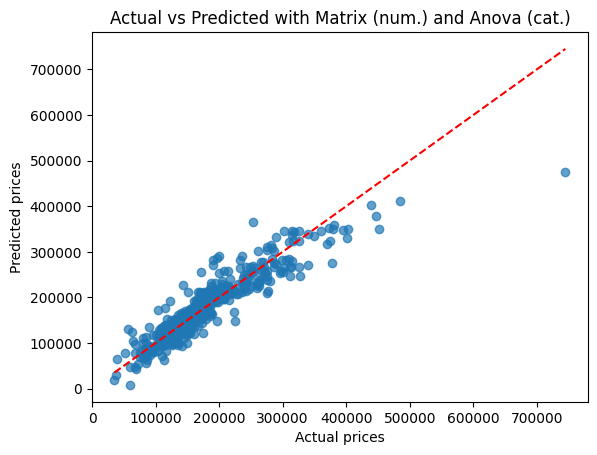

In [60]:
plt.scatter(y_test_Anova, y_pred_lr_Anova, alpha=0.7)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted with Matrix (num.) and Anova (cat.)")
plt.plot([y_test_Anova.min(), y_test_Anova.max()], [y_test_Anova.min(), y_test_Anova.max()], 'r--') 
plt.show()